# Practicals for lecture 1.1

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/vigji/python-cimec-2024/blob/main/practicals/Practicals_1.1.ipynb)

## More on `numpy`

#### 1.1.0 Operations with arrays

In [3]:
import numpy as np
from matplotlib import pyplot as plt

In [4]:
# Create an array with a range of numbers from 1 to 10 (not from 0 to 9!), 
# then elevate each element to the power of 2:
(np.arange(10) + 1)**2

array([  1,   4,   9,  16,  25,  36,  49,  64,  81, 100])

In [5]:
# Use np.stack to create a 10*10 matrix with rows of identical values going from 0 to 9, in this way:

# final_matrix = [[0,0,0,0,0,...],
#                 [1,1,1,1,1,...],
#                 [2,2,2,2,2,...],
#                 [.., .., .., ]]

# Hint: you can use a list comprehension to create the list of arrays to pass to np.stack()!

np.stack([np.full(10, i) for i in range(10)])

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
       [3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
       [5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
       [6, 6, 6, 6, 6, 6, 6, 6, 6, 6],
       [7, 7, 7, 7, 7, 7, 7, 7, 7, 7],
       [8, 8, 8, 8, 8, 8, 8, 8, 8, 8],
       [9, 9, 9, 9, 9, 9, 9, 9, 9, 9]])

In [6]:
# you have the following data matrix:
data_matrix = np.array([[1,2,3, 2, 5, 0, 2], 
                        [4,5,6, 8, 2, 3, 1]])

# And this array of offsets, one for every row:
offsets = np.array([2, 5])

# Can you directly subtract the offsets from the data matrix? If not, why?
data_matrix - offsets

ValueError: operands could not be broadcast together with shapes (2,7) (2,) 

In [7]:
# We can fix this!
# Remember, to match arrays we need to have either matching dimension size, OR a dimension size of 1.
# Currently, numpy is comparing second dimension of data_matrix with first dimension of offsets, 
# and they do not match.

# Use the syntax we have seen to add new singleton dimensions to convert offsets to an array
# of shape (2, 1), and then use it to try the operation again!
data_matrix - offsets[:, np.newaxis]

array([[-1,  0,  1,  0,  3, -2,  0],
       [-1,  0,  1,  3, -3, -2, -4]])

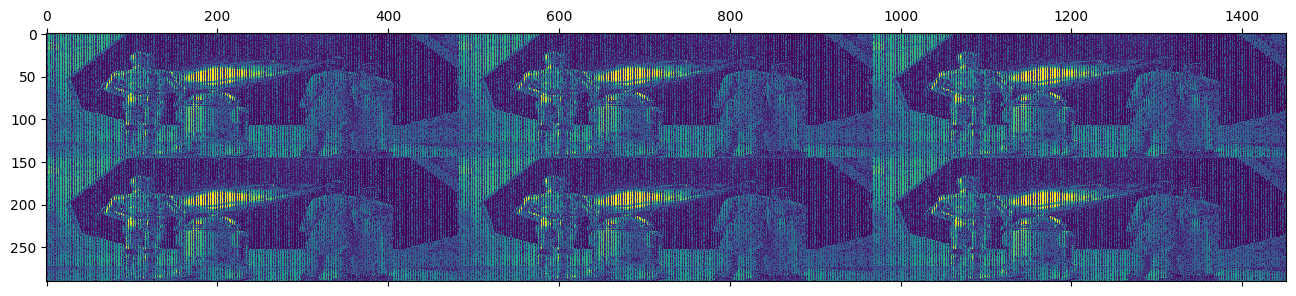

In [8]:
def fetch_image():
    import requests
    from io import BytesIO

    response = requests.get("https://github.com/vigji/python-cimec/raw/main/practicals/data/corrupted_img.npy")
    
    return np.load(BytesIO(response.content))

img = fetch_image()

# Start from the matrix you downloaded with the fetch_image() function above (same as last week practicals).
# Now use np.concatenate to repeat the matrix 2 times vertically, and 3 times horizontally.
# Hint: you will have to call np.concatenate twice to do it!
# Use plt.matshow() to check the result.
vertically_repeated = np.concatenate([img,]*2, axis=0)
plt.matshow(np.concatenate([vertically_repeated, ]*3, axis=1))

In [11]:
np.save("/Users/vigji/code/python-cimec-2025/lectures/files/correct_img.npy", img[:, ::2])

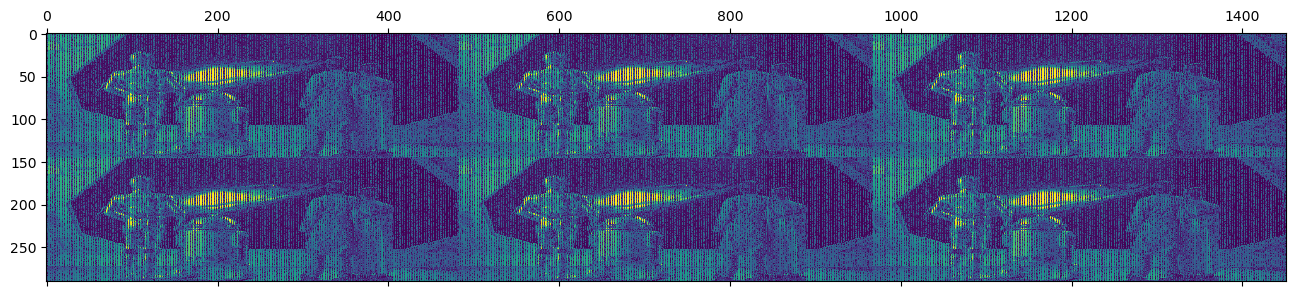

In [25]:
# Google (or chatGPT) how to use the np.tile() function to perform the same tiling using only one operation!

plt.matshow(np.tile(img, (2, 3)))

In [ ]:
# use plt.matshow() to show the transposed image:


#### 1.1.0 Stats over numpy arrays

In [ ]:
# Use np.random.normal to initialize a vector of 1000 numbers of mean 10 and standard deviation 3. 
# Then calculate the actual mean and standard deviation of the array you got using numpy.
arr = np.random.normal(10, 3, 1000)


In [3]:
# Exercise: this function generate sample Reaction Times data
# for many subjects. (200 subjects, 1000 RTs each)

import numpy as np

def generate_RT_data(n_subjects=200, n_samples_per_subject=1000):
    """
    Generates Reaction Time data for a given number of subjects, each with their own distribution parameters.
    
    Parameters:
    n_subjects (int): Number of subjects
    n_samples_per_subject (int): Number of samples (RT times) per subject
    
    Returns:
    np.ndarray: A 2D array where each row represents the RT times for a subject
    """
    np.random.seed(0)  # For reproducibility
    shift = 0.500  # Shift of the distribution
    # Initialize an empty array to store the RT times for all subjects
    RT_data = np.empty((n_subjects, n_samples_per_subject))
    
    for i in range(n_subjects):
        # Assuming mu ranges from 90 to 110 and sigma from 10 to 20 for the subjects
        mu = np.random.uniform(0.090, 0.110)
        sigma = np.random.uniform(0.10, 0.20)
        RT_data[i] = np.random.normal(mu, sigma, n_samples_per_subject) + shift
    
    return RT_data

rt_data = generate_RT_data()
# Compute the mean of the RT times for each subject and store it in a reaction_time_means
# array. Rember to specify the axis along which you are taking the mean!


# Then, use broadcasting to subtract the mean RTs from the data.
# Bonus: then organize your code in a function for mean subtraction!

In [1]:
import requests
import json

def download_meteo_data(start_date="2022-01-01", end_date="2022-12-31",
                        latitude="45.88204", longitude="11.03647",
                        data="temperature_2m"):
    """Download meteo historical data from open-meteo.com.
    
    Parameters
    ----------
        start_date : str
            Beginning of time series.
            
        end_date : str
            End of time series.
            
        latitude : float
            Latitude of the time series.
            
        longitude : float
            Longitude of the time series.
            
        data : str
            Data to download. One of "temperature_2m", "relativehumidity_2m",
            "precipitation", "snowfall", "windspeed_10m".
            
    Returns
    -------
        np.array
            1D array of timestamps
        np.array
            1D array of data, sampled every hour (24 points per day)

    """
    BASE_URL = "https://archive-api.open-meteo.com/v1/"
    query = f"archive?latitude={latitude}&longitude={longitude}&start_date={start_date}&end_date={end_date}&hourly={data}"

    r = requests.get(BASE_URL + query)
    json_dict = json.loads(r.text)
    
    if "hourly" not in json_dict.keys():
        print(json_dict)
        return None, None
    else:
        return (np.array(json_dict["hourly"][k]) for k in ["time", data])


timestamps_array, temperatures_array = download_meteo_data()
temperatures_array


NameError: name 'np' is not defined

In [ ]:
# Run the cell above to download an array of temperatures in Rovereto during 2022. 
# Temperatures data are sampled every hour, so the array has the length of num_days_year * num_hours_day

# Reshape the array to be a matrix of shape (n_days, n_hours). 
n_days = 365
n_hours = 24

# Plot it with plt.matshow() to check if it makes sense.

In [ ]:
# Use plt.plot to show temperatures for all days (each day a line). You can do it in a for loop,
# or in one call of the function given the right dimension order for the data matrix!

# Compute the average temperature line over days, and plot it on top of the individual day lines.
# (you can pass the `c` argument to specify line color. 
# Make the lines of the individual days gray and the average red!)


In [ ]:
# From the temperatures data, create one-dimensional arrays with the minimum, mean and maximum temperatures
# of each day.


# Look into the documentation for the plt.fill_between() function, and use it to make a plot 
# where you represent the temperature range for every day of the year.


In [ ]:
# Repeat the same, but now representing the 25th-75th percentile range for every day.


# Look into the documentation for the plt.fill_between() function, and use it to make a plot 
# where you represent the temperature range for every day of the year.


In [ ]:
# Are Murphy's laws true? Does it rain more on weekends?

# Look into docs of download_meteo_data(), and use it to download *precipitation data* from 2022, 
# but change the end_date argument to be end_date="2022-12-30" to have a multiple of 7 days!


In [ ]:
# Then, reshape the daily averages array to be of shape (n_weeks, n_weekdays)


# Finally, take the average over the n_weeks dimension and plot median precipitation for each weekday!
# Bonus points: represent the dispersion of the data (std or percentiles) using plt.fill_between().


#### 1.0.2 

In [7]:
# Go back to the RT data. Assume that w consider outliers the RTs longer than 0.7 seconds. 
# Compute again the mean RTs after having excluded such outliers, but make sure you use only vector operations!

# (Hint: an easy way to exclude outliers without using loops is by setting nans in the matrix)


array([0.81115773, 0.86475827, 0.77084648, 0.74749284, 0.8093885 ,
       0.72805993, 0.79298497, 0.79834661, 0.8063856 , 0.73985924,
       0.80264745, 0.84754963, 0.78776014, 0.77088147, 0.80802886,
       0.85612545, 0.81509353, 0.73642611, 0.82075299, 0.82811378,
       0.81536649, 0.75005669, 0.75521574, 0.84153778, 0.78390486,
       0.78420967, 0.74399619, 0.72675275, 0.83439989, 0.82156992,
       0.7974965 , 0.77913795, 0.75997075, 0.76608587, 0.72580777,
       0.80269684, 0.83290023, 0.83548828, 0.8413841 , 0.73372243,
       0.72861656, 0.80981105, 0.79096449, 0.83197026, 0.7866519 ,
       0.81647495, 0.73861152, 0.8409581 , 0.78271327, 0.79435368,
       0.76762708, 0.78778964, 0.83811019, 0.86749636, 0.74426569,
       0.7526576 , 0.734203  , 0.79632558, 0.82286621, 0.75289716,
       0.76976085, 0.75365782, 0.73455426, 0.76607152, 0.8181038 ,
       0.75064712, 0.79173779, 0.73611937, 0.8396602 , 0.72361491,
       0.79163198, 0.85761754, 0.78561538, 0.77479955, 0.86016

In [ ]:
# Find the index of the subject with the shortest trial reaction time of the whole dataset 
# (not shortest average!)
# (Hint: you will need two operations...)



In [1]:
# Use argmax to find the index of the warmest hour in the (non-reshaped) temperature_array.
# Then, use the index over timestamps_array to read out the corresponding timestamp.
timestamps_array, temperatures_array = download_meteo_data()

In [ ]:
# (Bonus: we did not do this in class!)
# We can use the np.argsort() function to produce the indexes array required to
# order an array in ascending or descending values.

# For example:
random_arr = np.array([0.1, 5, 3.4, 2.3])
ordering_idxs = np.argsort(random_arr)
random_arr[ordering_idxs]  # with this index, this is now ordered!

# Let's make a ranking of the 5 warmest hours of 2022! 
# Sort the (non-reshaped) temperature array using the indexes produced by np.argsort.
# so that the first elements are the highest temperatures.
# Then sort the imestamps array with the same indexes, and take the first 5.
#
# Double check you match the result that you have got in the exercises above!